In [1]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-most-popular-songs-dataset/songs.csv


In [3]:
dataset=pd.read_csv(r"/kaggle/input/spotify-most-popular-songs-dataset/songs.csv")
dataset.head(10)

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,Kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,...,kygo,"['bring', 'me', 'higher', 'love,', 'love', '',...",Kygo,bring higher love love bring higher love think...,"['bring', 'higher', 'love', 'love', 'bring', '...",[-0.1148182 0.27755967 0.27891365 0.143460...,[-0.1148182 0.27755967 0.27891365 0.143460...,3,https://i.scdn.co/image/ab67616d0000b2737c8977...,https://open.spotify.com/track/6oJ6le65B3SEqPw...
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),Billieeilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,...,billie eilish,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'...",Billie Eilish,yeah yeah oh ah white shirt red bloody nose sl...,"['yeah', 'yeah', 'oh', 'ah', 'white', 'shirt',...",[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,1,https://i.scdn.co/image/ab67616d0000b273a69b8b...,https://open.spotify.com/track/3yNZ5r3LKfdmjoS...
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),Samfeldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,...,sam feldt,"['one', 'more', 'drink,', 'got', 'one', 'more'...",Sam Feldt,one drink got one bacardi one dance afterparty...,"['one', 'drink', 'got', 'one', 'bacardi', 'one...",[-0.1616459 0.21872164 0.3755187 0.116120...,[-0.1616459 0.21872164 0.37551871 0.116120...,3,https://i.scdn.co/image/ab67616d0000b27354de16...,https://open.spotify.com/track/0qc4QlcCxVTGySh...
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,Elliegoulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,...,ellie goulding,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'...",Ellie Goulding,sixteen sixteen remember moved mum said love s...,"['sixteen', 'sixteen', 'remember', 'moved', 'm...",[-0.17123666 0.15697554 0.2319686 0.190121...,[-0.17123666 0.15697554 0.2319686 0.190121...,3,https://i.scdn.co/image/ab67616d0000b27394181f...,https://open.spotify.com/track/4PkIDTPGedm0enz...
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,Katyperry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,...,katy perry,"[""i'm"", 'losing', 'my', 'self', 'control', '',...",Katy Perry,im losing self control yeah youre starting tri...,"['im', 'losing', 'self', 'control', 'yeah', 'y...",[-0.26988247 0.21529263 0.3686135 0.180054...,[-0.26988247 0.21529263 0.36861351 0.180054...,3,https://i.scdn.co/image/ab67616d0000b2739bea3b...,https://open.spotify.com/track/5PYQUBXc7NYeI1o...
5,5,4Gcv5SsxnQWpmOnUI19EJk,all you need to know (feat. calle lehmann),Gryffin,0.000000,2019-03-27,Pop,0.397386,0.785385,0.000000,...,gryffin,"['simple', 'as', 'can', 'be', '', 'i', 'got', ...",Gryffin,simple got hands mine dont listen carefully il...,"['simple', 'got', 'hands', 'mine', 'dont', 'li...",[-1.35775790e-01 1.95568562e-01 4.11487609e-...,[-1.35775790e-01 1.95568562e-01 4.11487609e-...,1,https://i.scdn.co/image/ab67616d0000b27344fa3a...,https://open.spotify.com/track/4Gcv5SsxnQWpmOn...
6,6,4NSW0Km5ZG60L8FthUebPJ,what i like about you (feat. theresa rex),Jonasblue,0.227273,2019-03-22,Pop,0.328105,0.798262,0.090909,...,jonas blue,"['all', 'my', 'life,', ""i've"", 'been', 'a', 'g...",Jonas Blue,life ive good girl tryna whats right never tol...,"['life', 'ive', 'good', 'girl', 'tryna', 'what...",[-0.09478161 0.14201169 0.43457964 0.28851 ...,[-0.09478161 0.14201169 0.43457964 0.288509...,1,https://i.scdn.co/image/ab67616d0000b27376dd13...,https://open.spotify.com/track/4NSW0Km5ZG60L8F...
7,7,5tAa8Uaqr4VvA3693mbIhU,ruin my life,Zaralarsson,0.136364,2018-10-18,Pop,0.596078,0.689881,1.000000,...,zara larsson,"['i', 'miss', 'you', 'pushing', 'me', 'close',...",Zara Larsson,miss pushing close edge miss wish knew left mi...,"['miss', 'pushing', 'close', 'edge', 'miss', '...",[ 0.06875134 0.1647693 0.47390795 0.175238...,[

In [4]:
dataset.columns


Index(['Unnamed: 0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_release_date', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_merged', 'lyrics', 'artist_name', 'tags',
       'tags_tokenized', 'doc_vector', 'combined_vector', 'cluster',
       'image_url', 'spotify_url'],
      dtype='object')

In [5]:
dataset.drop(columns=['combined_vector','doc_vector','tags_tokenized','cluster'],inplace=True)

In [6]:
dataset.columns


Index(['Unnamed: 0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_release_date', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_merged', 'lyrics', 'artist_name', 'tags', 'image_url',
       'spotify_url'],
      dtype='object')

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist              900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    float64
 12  speechiness               900 non-null    float64
 13  acousticness              900 non-null    float64
 14  liveness  

## MOST POPULAR GENRE

In [8]:
dataset['playlist_genre']=dataset['playlist_genre'].astype(str)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist              900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    float64
 12  speechiness               900 non-null    float64
 13  acousticness              900 non-null    float64
 14  liveness  

In [9]:
print(dataset['playlist_genre'].apply(type).unique())


[<class 'str'>]


In [10]:
genreCount=dataset['playlist_genre'].value_counts()
print(genreCount)

playlist_genre
Pop      428
Rap      184
Latin    125
R&b       79
Rock      68
Edm       16
Name: count, dtype: int64


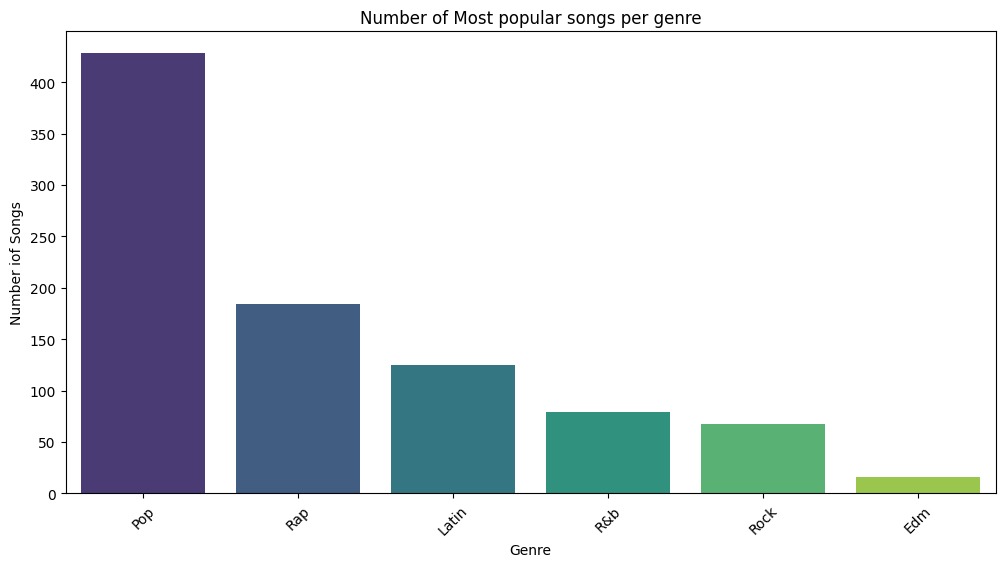

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=genreCount.index,y=genreCount.values,palette="viridis")
plt.xlabel('Genre')
plt.ylabel('Number iof Songs')
plt.title('Number of Most popular songs per genre')
plt.xticks(rotation=45)
plt.show()

### AVERAGE DANCEABILITY PER GENRE

In [12]:
genreDanceability=dataset.groupby('playlist_genre')['danceability'].mean().sort_values(ascending=False)
print(genreDanceability)

playlist_genre
Rap      0.727252
Latin    0.696627
Edm      0.640033
Pop      0.597783
R&b      0.578373
Rock     0.417339
Name: danceability, dtype: float64


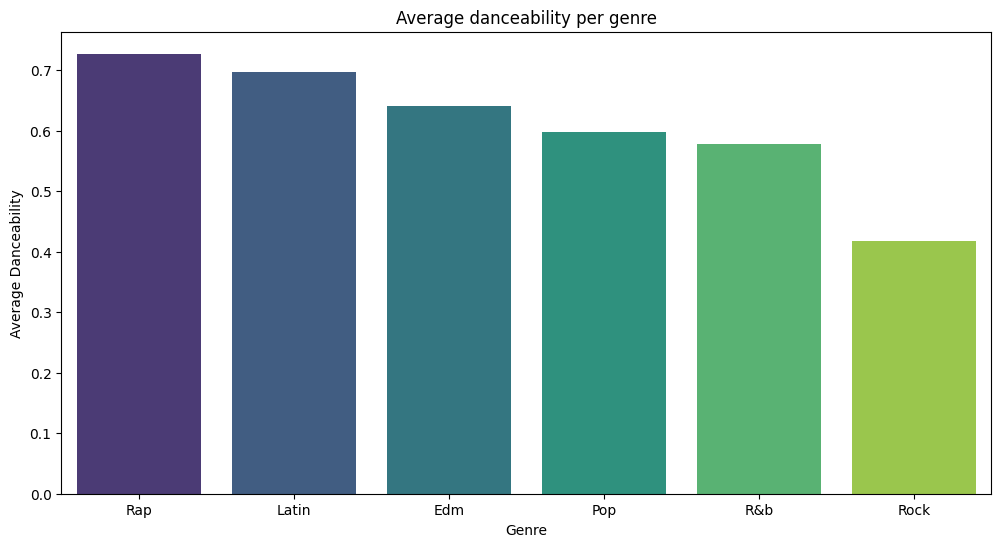

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=genreDanceability.index,y=genreDanceability.values,palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.title('Average danceability per genre')
plt.show()

## CORRELATION BETWEEN DANCEABILITY AND ENERGY, KEY, LOUDNESS,MODE,SPEECHINESS,ACOUSTICNESS,LIVENESS,VALENCE AND TEMPO

In [14]:

def classify_correlation(value):
    if value == 1:
        return "Perfect positive correlation"
    elif 0.7 < value < 0.9:
        return "Strong positive correlation"
    elif 0.4 < value < 0.6:
        return "Moderate positive correlation"
    elif 0.1 < value < 0.3:
        return "Weak positive correlation"
    elif value == 0:
        return "No correlation"
    elif -0.3 < value < -0.1:
        return "Weak negative correlation"
    elif -0.9 < value < -0.7:
        return "Strong negative correlation"
    elif value == -1:
        return "Perfect negative correlation"
    else:
        return "Moderate correlation (between -0.7 and 0.7)"


correlation_matrix = dataset[['danceability', 'energy', 'key', 'loudness', 
                              'mode', 'speechiness', 'acousticness', 
                              'liveness', 'valence', 'tempo']].corr()


for i in correlation_matrix.index:
    for j in correlation_matrix.columns:
        if i != j: 
            correlation = correlation_matrix.loc[i, j]
            classification = classify_correlation(correlation)
            print(f"Correlation between {i} and {j}: {correlation:.2f} → {classification}")


Correlation between danceability and energy: 0.03 → Moderate correlation (between -0.7 and 0.7)
Correlation between danceability and key: 0.00 → Moderate correlation (between -0.7 and 0.7)
Correlation between danceability and loudness: 0.11 → Weak positive correlation
Correlation between danceability and mode: -0.11 → Weak negative correlation
Correlation between danceability and speechiness: 0.24 → Weak positive correlation
Correlation between danceability and acousticness: -0.16 → Weak negative correlation
Correlation between danceability and liveness: -0.03 → Moderate correlation (between -0.7 and 0.7)
Correlation between danceability and valence: 0.35 → Moderate correlation (between -0.7 and 0.7)
Correlation between danceability and tempo: -0.13 → Weak negative correlation
Correlation between energy and danceability: 0.03 → Moderate correlation (between -0.7 and 0.7)
Correlation between energy and key: 0.01 → Moderate correlation (between -0.7 and 0.7)
Correlation between energy an

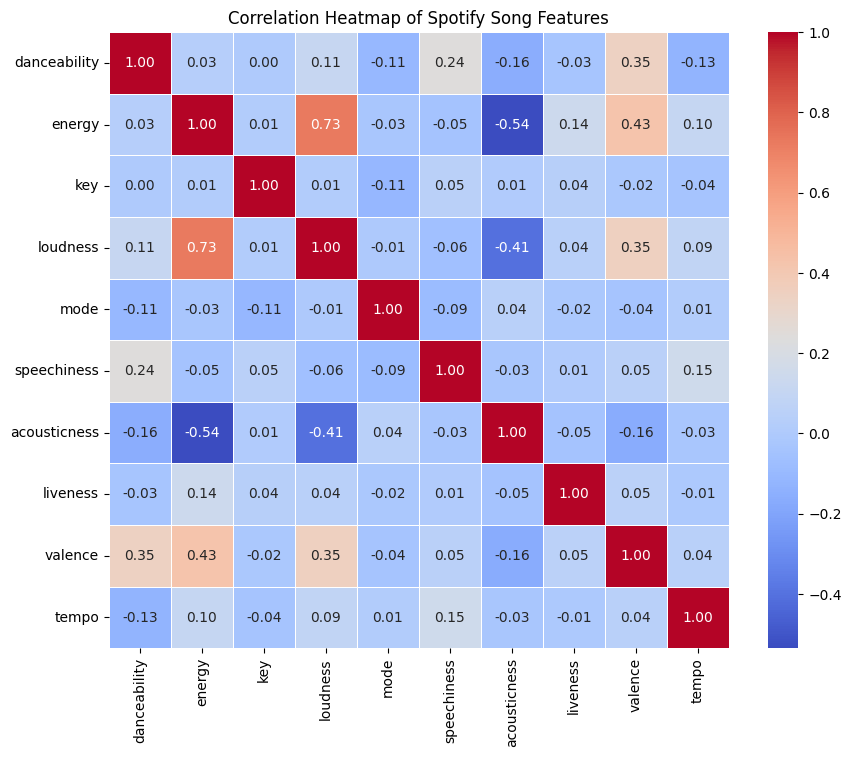

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Spotify Song Features")
plt.show()